## Ingest

#### 

#### importing a dataset to use for the project

In [14]:
import pandas as pd
import seaborn.objects as so
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings

# importing dataset

diamonds = pd.read_csv(
    "https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/diamonds.csv"
)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### EDA

#### Dataset size

In [15]:
print(diamonds.size)

539400


#### Attributes of the diamonds by showing the columns

In [16]:
print(diamonds.columns)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


In [17]:
# price price in US dollars (\$326--\$18,823)
# carat weight of the diamond (0.2--5.01)
# cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
# color diamond colour, from J (worst) to D (best)
# clarity a measurement of how clear the diamond
# is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
# x length in mm (0--10.74)
# y width in mm (0--58.9)
# z depth in mm (0--31.8)
# depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
# table width of top of diamond relative to widest point (43--95)

In [18]:
print(diamonds.dtypes)

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


In [19]:
diamonds.price.describe()  # checking the summary statistics for price dataset.

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [20]:
diamonds.cut.value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [21]:
diamonds.color.value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [22]:
diamonds.clarity.value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [23]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [24]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

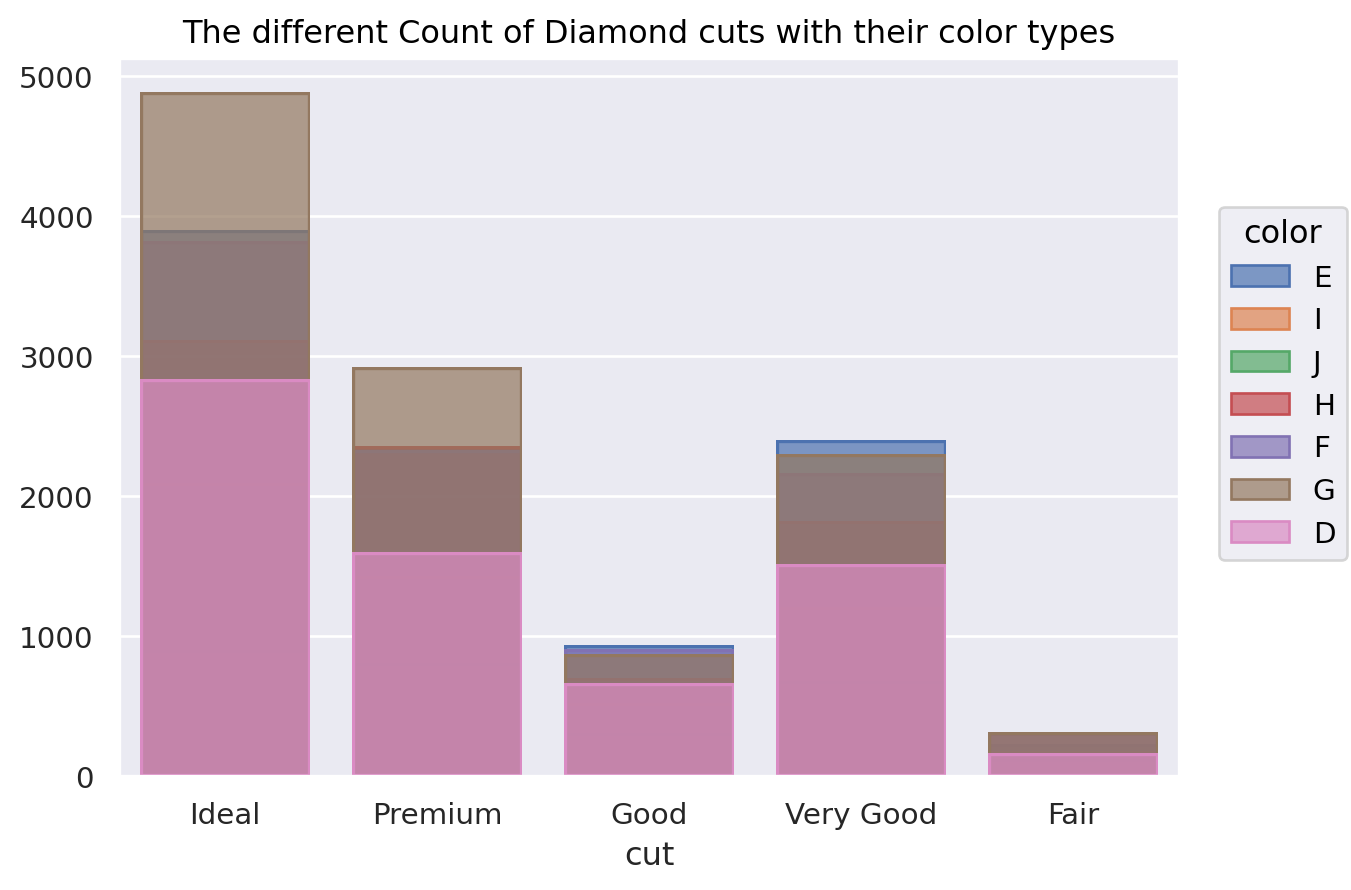

In [25]:
so.Plot(diamonds, x="cut", color="color").add(so.Bar(), so.Hist()).label(
    title="The different Count of Diamond cuts with their color types"
)

#### Modelling

In [26]:
# Filter out warnings
warnings.filterwarnings("ignore")

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    diamonds[["x", "y", "z", "price"]],
    diamonds["cut"],
    test_size=0.3,
    random_state=42,
)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on testing set
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is: {accuracy}")
print("This is the accuracy of the model to predit the cut of the diamonds")

The accuracy of the model is: 0.4003831417624521
This is the accuracy of the model to predit the cut of the diamonds


#### Conclusion

This is a simple Logistic Regression model which is built to predict the kind of cut of a diamond using the diamonds data set with an accuracy model of 0.400